In [1]:
#importação inicial para funcionamento do Google Colab
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')
nb_path = 'https://drive.google.com/file/d/1I6a4zvmIFMNEnWTQntt1-tCk-vrIx_kl/view?usp=sharing'
sys.path.insert(0,nb_path)
%cd /content/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive


In [2]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/US_Accidents_Dec21_updated.csv',sep=',',encoding='utf-8 ')

In [3]:
data.head(5)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

base de referencia https://www.kaggle.com/sobhanmoosavi/us-accidents/notebooks

Já está baixada no diretório do notebook

# Sequencia de passos do exercicio

## Tratativa da base

importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica

importando o arquivo em si, usando encoding utf-8 (como é um arquivo americano cobre todos os caracteres)

Como o arquivo e muito grande, podemos utilizar apenas as primeiras ou ultimas 100000 linhas

In [4]:
data=data.head(100000)

Garanta que não existam linhas duplicadas no seu dataset, isso pode enviesar sua análise no final.

In [5]:
print(f"Tamanho original do dataset: {len(data)}")
data = data.drop_duplicates(subset=data.columns[1:])
print(f"Tamanho removendo linhas duplicadas do dataset: {len(data)}")


Tamanho original do dataset: 100000
Tamanho removendo linhas duplicadas do dataset: 100000


Vamos trocar a nomenclatura das colunas para deixar a interpretação mais fácil tanto para a equipe atuarial quanto para a equipe de vendas. Escolha de nomes é livre

In [6]:
lista_nomes_originais = list(data.columns)
lista_nomes_originais

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [7]:
nova_lista_atributos = ['id','gravidade','tempo_inicio','tempo_fim','inicio_latitude','inicio_longitude','fim_latitude','fim_longitude','distancia_milhas','descricao_humana_acidente','num_endereco','nome_rua','lado_rua','cidade','condado','estado','cep','pais','timezone','cod_base_mete_aeroporto_prox','tempo_medicao_meteorologica','temperatura','vento_frio','umidade','pressao_atmosferica','visibilidade','direcao_vento','velocidade_vento','precipitacao','condicao_tempo','amenidade','lombada_prox','cruzamento_prox','placa_preferencial', 'juncao', 'rua_sem_saida','ferrovia','rotatória',  'estacao_transporte','placa_pare','trafico_lento', 'sinaleiro','viadutos','turno_luz_sol','turno_civil','turno_nautico','turno_astronomico' ]
nova_lista_atributos

['id',
 'gravidade',
 'tempo_inicio',
 'tempo_fim',
 'inicio_latitude',
 'inicio_longitude',
 'fim_latitude',
 'fim_longitude',
 'distancia_milhas',
 'descricao_humana_acidente',
 'num_endereco',
 'nome_rua',
 'lado_rua',
 'cidade',
 'condado',
 'estado',
 'cep',
 'pais',
 'timezone',
 'cod_base_mete_aeroporto_prox',
 'tempo_medicao_meteorologica',
 'temperatura',
 'vento_frio',
 'umidade',
 'pressao_atmosferica',
 'visibilidade',
 'direcao_vento',
 'velocidade_vento',
 'precipitacao',
 'condicao_tempo',
 'amenidade',
 'lombada_prox',
 'cruzamento_prox',
 'placa_preferencial',
 'juncao',
 'rua_sem_saida',
 'ferrovia',
 'rotatória',
 'estacao_transporte',
 'placa_pare',
 'trafico_lento',
 'sinaleiro',
 'viadutos',
 'turno_luz_sol',
 'turno_civil',
 'turno_nautico',
 'turno_astronomico']

In [8]:
data.columns =nova_lista_atributos

In [9]:
data.head(3)

id  gravidade         tempo_inicio            tempo_fim  inicio_latitude  \
0  A-1          3  2016-02-08 00:37:08  2016-02-08 06:37:08         40.10891   
1  A-2          2  2016-02-08 05:56:20  2016-02-08 11:56:20         39.86542   
2  A-3          2  2016-02-08 06:15:39  2016-02-08 12:15:39         39.10266   

   inicio_longitude  fim_latitude  fim_longitude  distancia_milhas  \
0         -83.09286      40.11206      -83.03187             3.230   
1         -84.06280      39.86501      -84.04873             0.747   
2         -84.52468      39.10209      -84.52396             0.055   

                           descricao_humana_acidente  ...  rotatória  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...      False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...      False   
2                   At I-71/US-50/Exit 1 - Accident.  ...      False   

  estacao_transporte placa_pare trafico_lento sinaleiro viadutos  \
0              False      False         False     False    False   
1              False      False         False     False    False   
2              False      False         False     False    False   

  turno_luz_sol turno_civil turno_nautico turno_astronomico  
0         Night       Night         Night             Night  
1         Night       Night         Night             Night  
2         Night       Night         Night               Day  

[3 rows x 47 columns]

Tratar as células que contém data, para garantir que estão no formato de data legível pelo Python



In [10]:
#observando os tipos de dados
data.dtypes

id                               object
gravidade                         int64
tempo_inicio                     object
tempo_fim                        object
inicio_latitude                 float64
inicio_longitude                float64
fim_latitude                    float64
fim_longitude                   float64
distancia_milhas                float64
descricao_humana_acidente        object
num_endereco                    float64
nome_rua                         object
lado_rua                         object
cidade                           object
condado                          object
estado                           object
cep                              object
pais                             object
timezone                         object
cod_base_mete_aeroporto_prox     object
tempo_medicao_meteorologica      object
temperatura                     float64
vento_frio                      float64
umidade                         float64
pressao_atmosferica             float64


In [11]:
# A principio existem 3 váriaveis que tem a necessidade de transformação são elas
# Antiga: Start_Time --> Nova: tempo_inicio
# Antiga: End_Time --> Nova: tempo_fim
# Antiga: Weather_Timestamp --> Nova: tempo_medicao_meteorologica

data['tempo_inicio'] = pd.to_datetime(data['tempo_inicio'])
data['tempo_fim'] = pd.to_datetime(data['tempo_fim'])
data['tempo_medicao_meteorologica'] = pd.to_datetime(data['tempo_medicao_meteorologica'])
data['tempo_medicao_meteorologica_old'] = pd.to_datetime(data['tempo_medicao_meteorologica'])
data.dtypes

id                                         object
gravidade                                   int64
tempo_inicio                       datetime64[ns]
tempo_fim                          datetime64[ns]
inicio_latitude                           float64
inicio_longitude                          float64
fim_latitude                              float64
fim_longitude                             float64
distancia_milhas                          float64
descricao_humana_acidente                  object
num_endereco                              float64
nome_rua                                   object
lado_rua                                   object
cidade                                     object
condado                                    object
estado                                     object
cep                                        object
pais                                       object
timezone                                   object
cod_base_mete_aeroporto_prox               object


Vamos verificar em quais colunas há valores nulos e se há a necessidade de preenchê-los

Podemos ver que temos muitas variáveis que possuem valor nulo. Abaixo seguem listadas quais são elas e como elas devem ser tratadas quando nulas.



End Lat - preencher com "N/A"

End Lng - preencher com "N/A"

Street_Number - preencher com "N/A"

City - preencher com "N/A"

Sunrise_Sunset - preencher com "N/A"

Civil_Twilight - preencher com "N/A"

Nautical_Twilight - preencher com "N/A"

Astronomical_Twilight - preencher com "N/A"

Timezone - preencher com "N/A"

Airport Code - preencher com "N/A"

Weather Timestamp - preencher com "N/A"

Wind_Direction - preencher com "N/A"

Weather_Condition - preencher com "N/A"

In [12]:
lista_na = ['fim_latitude','fim_longitude','num_endereco', 'cidade','turno_luz_sol',
            'turno_civil','turno_nautico','turno_astronomico','timezone',
            'cod_base_mete_aeroporto_prox','tempo_medicao_meteorologica',
            'direcao_vento','condicao_tempo']

for i in lista_na:
  data[i].fillna("N/A",inplace=True)


Traffic_Message_Channel - preencher com o valor 999 ou com o valor 0
*  **Não encontrei esse atributo na base**


Zipcode - preencher com 99999


In [13]:
data['cep'].fillna(99999,inplace=True)

In [14]:
data['temperatura'].fillna('zero',inplace=True)

In [15]:
data.isnull().sum()

id                                     0
gravidade                              0
tempo_inicio                           0
tempo_fim                              0
inicio_latitude                        0
inicio_longitude                       0
fim_latitude                           0
fim_longitude                          0
distancia_milhas                       0
descricao_humana_acidente              0
num_endereco                           0
nome_rua                               0
lado_rua                               0
cidade                                 0
condado                                0
estado                                 0
cep                                    0
pais                                   0
timezone                               0
cod_base_mete_aeroporto_prox           0
tempo_medicao_meteorologica            0
temperatura                            0
vento_frio                         82147
umidade                             2403
pressao_atmosfer

Temperature (F) - preencher com a media da temperatura para cada periodo em cada cidade (Manha,Tarde,Noite,Madrugada:6a12h,12a18h,18a24h,24a6h)


In [16]:
data.loc[[158],'temperatura']

158    zero
Name: temperatura, dtype: object

In [17]:
data.isnull().sum()

id                                     0
gravidade                              0
tempo_inicio                           0
tempo_fim                              0
inicio_latitude                        0
inicio_longitude                       0
fim_latitude                           0
fim_longitude                          0
distancia_milhas                       0
descricao_humana_acidente              0
num_endereco                           0
nome_rua                               0
lado_rua                               0
cidade                                 0
condado                                0
estado                                 0
cep                                    0
pais                                   0
timezone                               0
cod_base_mete_aeroporto_prox           0
tempo_medicao_meteorologica            0
temperatura                            0
vento_frio                         82147
umidade                             2403
pressao_atmosfer

In [18]:
import numpy as np

data_aux = data.copy()
data_aux['ano_aux'] = data.tempo_medicao_meteorologica_old.dt.year
data_aux['mes_aux'] = data.tempo_medicao_meteorologica_old.dt.month
data_aux['dia_aux'] = data.tempo_medicao_meteorologica_old.dt.day
data_aux['horas_aux'] = data.tempo_medicao_meteorologica_old.dt.hour

for i, row in enumerate(data.itertuples(), 0):

  if row.temperatura == 'zero':
    ano= row.tempo_inicio.year
    mes = row.tempo_inicio.month
    dia = row.tempo_inicio.day
    hour= row.tempo_inicio.hour

    if hour >=6 and hour <12:
      data_filter = data_aux.query("(ano_aux==@ano) & (mes_aux ==@mes) and (dia_aux==@dia) and (horas_aux >= 6) and (horas_aux < 12)")
      data_filter = data_filter.drop(data_filter[data_filter.temperatura == 'zero'].index)
      data.loc[i, 'temperatura'] = round(data_filter['temperatura'].mean(), 1)


    #Tarde
    elif hour >=12 and hour < 18:
      data_filter = data_aux.query("(ano_aux==@ano) & (mes_aux ==@mes) and (dia_aux==@dia) and (horas_aux >= 12) and (horas_aux < 18)")
      data_filter = data_filter.drop(data_filter[data_filter.temperatura == 'zero'].index)
      data.loc[i, 'temperatura'] = round(data_filter['temperatura'].mean(), 1)
      
    #Noite
    elif hour >=18 and hour < 24:
      data_filter = data_aux.query("(ano_aux==@ano) & (mes_aux ==@mes) and (dia_aux==@dia) and (horas_aux >= 18) and (horas_aux < 24)")
      data_filter = data_filter.drop(data_filter[data_filter.temperatura == 'zero'].index)
      data.loc[i, 'temperatura'] = round(data_filter['temperatura'].mean(), 1)
     


    #Madrugada
    elif hour >=24 or hour < 6:
      data_filter = data_aux.query("(ano_aux==@ano) & (mes_aux ==@mes) and (dia_aux==@dia) and (horas_aux >= 24) and (horas_aux < 6)")
      data_filter = data_filter.drop(data_filter[data_filter.temperatura == 'zero'].index)
      data.loc[i, 'temperatura'] = round(data_filter['temperatura'].mean(), 1)
 

    else:
      print("Bug")

   
data['temperatura'].fillna(round(data_filter['temperatura'].mean(), 1),inplace=True) 

Wind_Chill(F) - preencher com 999


In [19]:
data['vento_frio'].fillna(999,inplace=True)

Humidity(%) - preencher com 0

Pressure(in) - preencher com 0

Visibility(mi) - preencher com 0

Wind_Speed(mph) - preencher com 0

Precipitation(in) - preencher com 0

In [20]:
lista_valores_0 = ['umidade','pressao_atmosferica','visibilidade','velocidade_vento','precipitacao']
for i in lista_valores_0:
  data[i].fillna(0,inplace=True)

Vamos converter mph para Kmph, in para cm, mi para km e F para C

### formulas

F para C : (X − 32) × 5/9

In [21]:
data['temperatura'] = (data['temperatura']-32)*(5/9)

in para cm : x * 2.54

In [22]:
data['pressao_atmosferica'] =data['pressao_atmosferica']*2.54
data['precipitacao'] =data['precipitacao']*2.54

mph para kmph e mi para km : x * 1.6

In [23]:
data['velocidade_vento'] = data['velocidade_vento']*1.6

In [24]:
data.drop(columns='tempo_medicao_meteorologica_old')

id  gravidade        tempo_inicio           tempo_fim  \
0           A-1          3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1           A-2          2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2           A-3          2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3           A-4          2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4           A-5          3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...         ...        ...                 ...                 ...   
99995   A-99996          2 2016-05-20 15:56:27 2016-05-20 21:56:27   
99996   A-99997          2 2016-05-20 16:03:04 2016-05-20 22:03:04   
99997   A-99998          2 2016-05-20 16:05:47 2016-05-20 22:05:47   
99998   A-99999          3 2016-05-20 16:04:24 2016-05-20 22:04:24   
99999  A-100000          2 2016-05-20 16:18:53 2016-05-20 22:18:53   

       inicio_latitude  inicio_longitude  fim_latitude  fim_longitude  \
0            40.108910        -83.092860     40.112060     -83.031870   
1            39.865420        -84.062800     39.865010     -84.048730   
2            39.102660        -84.524680     39.102090     -84.523960   
3            41.062130        -81.537840     41.062170     -81.535470   
4            39.172393        -84.492792     39.170476     -84.501798   
...                ...               ...           ...            ...   
99995        39.958020        -75.163290     39.958420     -75.166470   
99996        40.700200        -73.985110     40.698410     -73.983150   
99997        39.872430        -75.102280     39.871020     -75.102120   
99998        40.778840        -73.826470     40.784510     -73.824330   
99999        40.109540        -75.294850     40.111060     -75.286980   

       distancia_milhas                          descricao_humana_acidente  \
0                 3.230  Between Sawmill Rd/Exit 20 and OH-315/Olentang...   
1                 0.747                 At OH-4/OH-235/Exit 41 - Accident.   
2                 0.055                   At I-71/US-50/Exit 1 - Accident.   
3                 0.123                    At Dart Ave/Exit 21 - Accident.   
4                 0.500                 At Mitchell Ave/Exit 6 - Accident.   
...                 ...                                                ...   
99995             0.171                            At Broad St - Accident.   
99996             0.161               At Manhattan BR/Exit 29A - Accident.   
99997             0.098                        Ramp to Exit 26 - Accident.   
99998             0.407                    At 20th Ave/Exit 15 - Accident.   
99999             0.429            At Germantown Pike/Exit 333 - Accident.   

       ... rotatória estacao_transporte placa_pare trafico_lento sinaleiro  \
0      ...     False              False      False         False     False   
1      ...     False              False      False         False     False   
2      ...     False              False      False         False     False   
3      ...     False              False      False         False     False   
4      ...     False              False      False         False     False   
...    ...       ...                ...        ...           ...       ...   
99995  ...     False              False      False         False     False   
99996  ...     False              False      False         False     False   
99997  ...     False              False      False         False     False   
99998  ...     False              False      False         False     False   
99999  ...     False              False      False         False     False   

      viadutos turno_luz_sol turno_civil turno_nautico turno_astronomico  
0        False         Night       Night         Night             Night  
1        False         Night       Night         Night             Night  
2        False         Night       Night         Night               Day  
3        False         Night       Night           Day               Day  
4        False           Day         Day      

Agora que toda a base está tratada, vamos observar alguns dados gerais antes de começar nossas análises de fato? Vamos começar olhando dados estatísticos gerais da base.

## Análises auxiliares para equipe atuarial

Aqui voce pode seguir sua criatividade e brincar com a informacao.

Algumas sugestões de relações que podem impactar no estudo atuarial por região:

Severidade do acidente versus região

Severidade do acidente versus região versus horário do dia

Severidade do acidente versus temperatura versus precipitação

Quantidade de acidentes por severidade por região

Encontrar quais regioes possuem o maior numero de acidentes

Encontrar o periodo do dia com maior numero de acidentes

Verificar correlacoes entre as variaveis e o numero de **acidentes**

Severidade do acidente versus região

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
!pip install plotly-geo
import plotly.graph_objects as go

# Números de acidentes por região

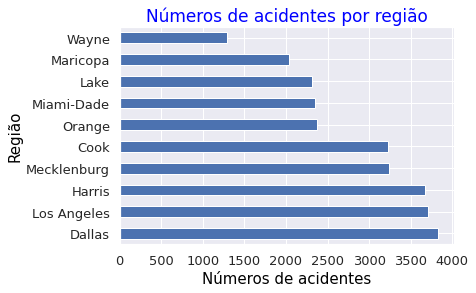

In [26]:
condado_acidentes = data.condado.value_counts()
condado_acidentes[0:10].plot(kind='barh')
plt.title('Números de acidentes por região',size=17, color='blue')
plt.xlabel('Números de acidentes', fontsize=15, color='black')
plt.ylabel('Região', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Severidade dos acidentes

In [27]:
data_sever = data

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_sever['inicio_longitude'],
        lat = data_sever['inicio_latitude'],
        text = data_sever['cidade'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = data_sever['gravidade'].max(),
        color = data_sever['gravidade'],
        cmax = 1,
            colorbar_title="Gravidade"
        )))

fig.update_layout(
        title = 'Gravidade Acidentes',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

# Números de acidentes por cidade

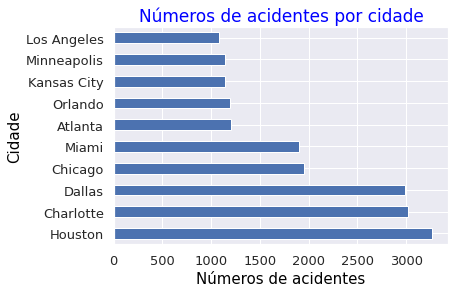

In [28]:
cidade_acidentes = data.cidade.value_counts()
cidade_acidentes[0:10].plot(kind='barh')
plt.title('Números de acidentes por cidade',size=17, color='blue')
plt.xlabel('Números de acidentes', fontsize=15, color='black')
plt.ylabel('Cidade', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Frequência de acidentes por estados

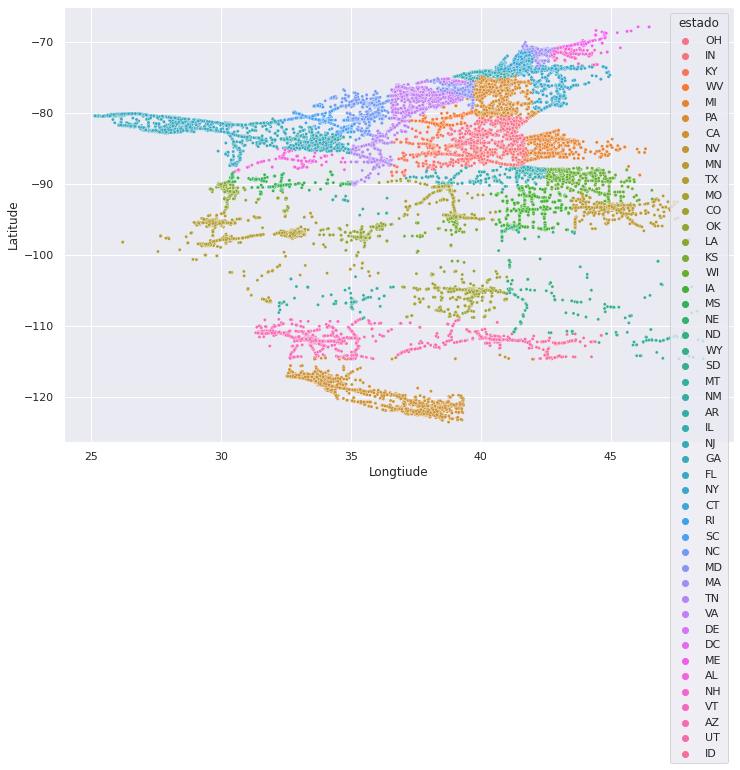

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="inicio_latitude", y="inicio_longitude", hue="estado", data=data, s=10, legend=True)
plt.xlabel("Longtiude")
plt.ylabel("Latitude")
plt.show()

# Contagem da gravidade dos acidentes

Text(0.5, 1.0, 'Grau de Gravidade')

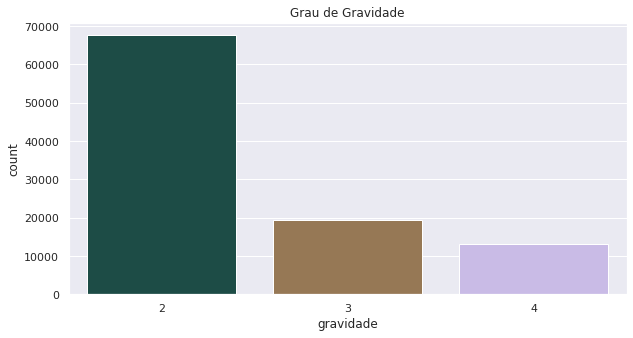

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="gravidade", data=data, palette = "cubehelix")
sev.set_title("Grau de Gravidade")

# Contagem dos acidentes no Ano de 2016 por cada mês

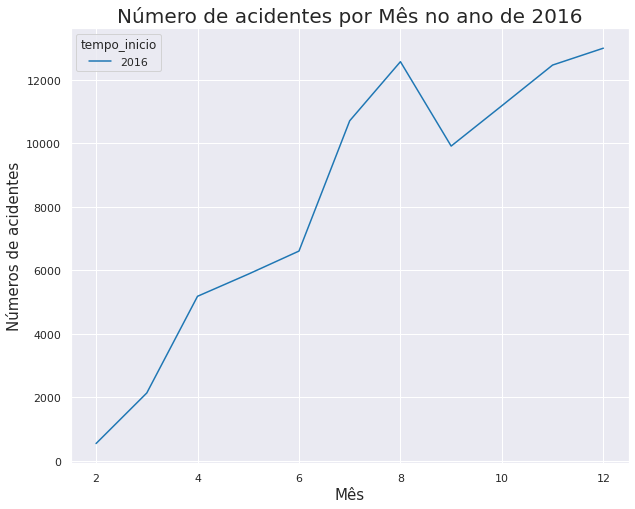

In [31]:
year_month = data["tempo_inicio"].groupby(data.tempo_inicio.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_data= pd.DataFrame(data.tempo_inicio.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","tempo_inicio":"Accident_Cases"})
year_data = year_data[:-1]


year_month = data["tempo_inicio"].groupby(data.tempo_inicio.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month = year_month[:-1]


palette = sns.color_palette("tab10", 1)
plt.figure(figsize = (10,8))
plt.xlabel("Mês",fontsize=15)
plt.ylabel("Números de acidentes",fontsize=15)
plt.title('Número de acidentes por Mês no ano de 2016',size=20)
sns.lineplot(data=year_month, x=year_month.tempo_inicio.dt.month, y=year_month.Num_Accidents, hue=year_month.tempo_inicio.dt.year,
             style=year_month.tempo_inicio.dt.year, palette=palette)

# Contagem de acidentes referênte as horas do dia 

Text(0.5, 1.0, 'Contagem de acidentes por horas do dia')

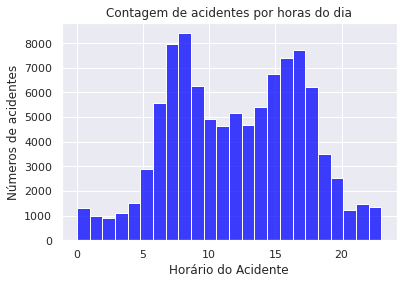

In [32]:
sns.histplot(data.tempo_inicio.dt.hour,bins=24,kde=False,color='blue')

plt.xlabel("Horário do Acidente")
plt.ylabel("Números de acidentes")
plt.title('Contagem de acidentes por horas do dia')

# As 8 condições climáticas que influeciaram nos acidentes

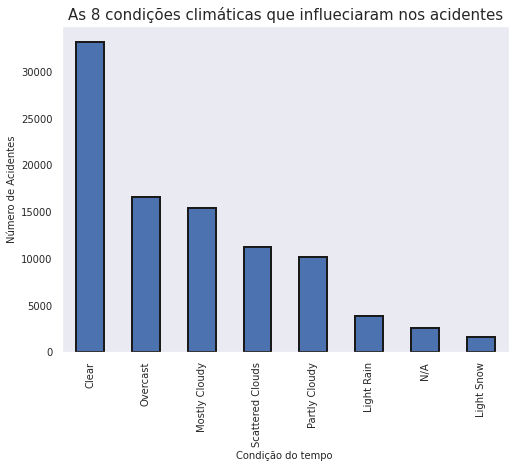

In [33]:
fig, ax=plt.subplots(figsize=(8,6))
data['condicao_tempo'].value_counts().sort_values(ascending=False).head(8).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Condição do tempo ',fontsize=10)
plt.ylabel('Número de Acidentes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('As 8 condições climáticas que influeciaram nos acidentes',fontsize=15)
plt.grid()
plt.ioff()

#Correlação das variaveis
* variáveis numéricas 

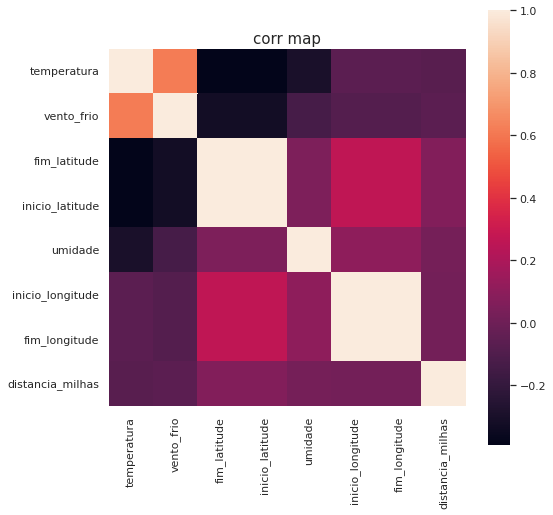

In [34]:
x_cols = [col for col in data.columns if col not in ['gravidade'] if data[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.gravidade.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
corr_df_sel
corr_df_ = corr_df_sel.col_labels.tolist()

tem_df = data[corr_df_]

corrmat = tem_df.corr(method='spearman')
fig,ax= plt.subplots(figsize=(8,8))

sns.heatmap(corrmat,vmax=1,square = True)
plt.title('corr map',fontsize=15)
plt.show()


# Informações adicionais

In [35]:
# São seis graficos para serem gerados
condado_plot = data['condado'].value_counts()*100 / len(data)
estado_plot = data['estado'].value_counts()*100 / len(data)
timezone_plot = data['timezone'].value_counts()*100 / len(data)
condicao_tempo_plot = data['condicao_tempo'].value_counts()*100 / len(data)
turno_civil_plot = data['turno_civil'].value_counts()*100 / len(data)
direcao_vento_plot = data['direcao_vento'].value_counts()*100 / len(data)
condado_plot = condado_plot[:10]
estado_plot = estado_plot[:10]
timezone_plot = timezone_plot[:15]
condicao_tempo_plot = condicao_tempo_plot [:15]
turno_civil_plot = turno_civil_plot[:15]
direcao_vento_plot = direcao_vento_plot [:15]

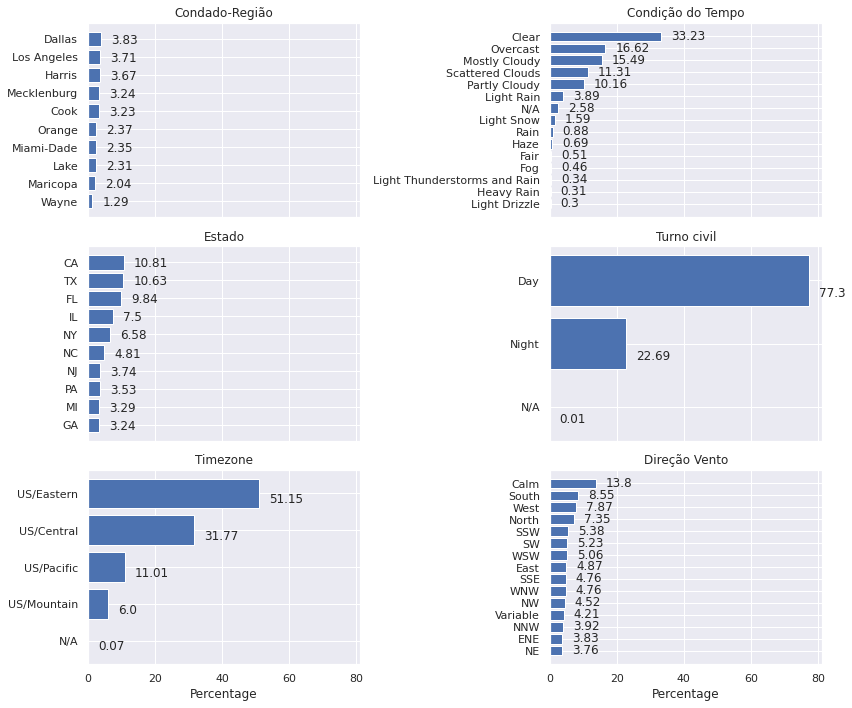

In [36]:
f, axs = plt.subplots(3, 2, sharex=True, figsize=(12, 10))

## education plot
axs[0,0].barh(condado_plot.index, condado_plot, .8)
axs[0,0].invert_yaxis()  
axs[0,0].set_title('Condado-Região')
for i, v in enumerate(condado_plot):
    axs[0,0].text(v + 3, i + .25, str(round(v,2)))

## occupation plot
axs[1,0].barh(estado_plot.index, estado_plot, .8)
axs[1,0].invert_yaxis()  
axs[1,0].set_title('Estado')
for i, v in enumerate(estado_plot):
    axs[1,0].text(v + 3, i + .25, str(round(v,2)))
    
## sex plot
axs[2,0].barh(timezone_plot.index, timezone_plot, .8)
axs[2,0].invert_yaxis()  
axs[2,0].set_title('Timezone')
for i, v in enumerate(timezone_plot):
    axs[2,0].text(v + 3, i + .25, str(round(v,2)))
    
## marital status
axs[0,1].barh(condicao_tempo_plot.index, condicao_tempo_plot, .8)
axs[0,1].invert_yaxis()  
axs[0,1].set_title('Condição do Tempo')
for i, v in enumerate(condicao_tempo_plot):
    axs[0,1].text(v + 3, i + .25, str(round(v,2)))
   
## Relationship
axs[1,1].barh(turno_civil_plot.index, turno_civil_plot, .8)
axs[1,1].invert_yaxis()  
axs[1,1].set_title('Turno civil')
for i, v in enumerate(turno_civil_plot):
    axs[1,1].text(v + 3, i + .25, str(round(v,2)))
    
## Workclass
axs[2,1].barh(direcao_vento_plot.index, direcao_vento_plot, .8)
axs[2,1].invert_yaxis()  
axs[2,1].set_title('Direção Vento')
for i, v in enumerate(direcao_vento_plot):
    axs[2,1].text(v + 3, i + .25, str(round(v,2)))

    
axs[2,0].set_xlabel('Percentage')    
axs[2,1].set_xlabel('Percentage')
#axs[2,0].set_xticks([0,10,20,30,40,50,60,70,80,90], labels=['0', '10', '20', '30', '40', '50', '60', '70', '80','90'])
#axs[2,1].set_xticks([0,10,20,30,40,50,60,70,80,90], labels=['0', '10', '20', '30', '40', '50', '60', '70', '80','90'])

    
plt.tight_layout()

#Correlação das variaveis
* Todas variáveis  

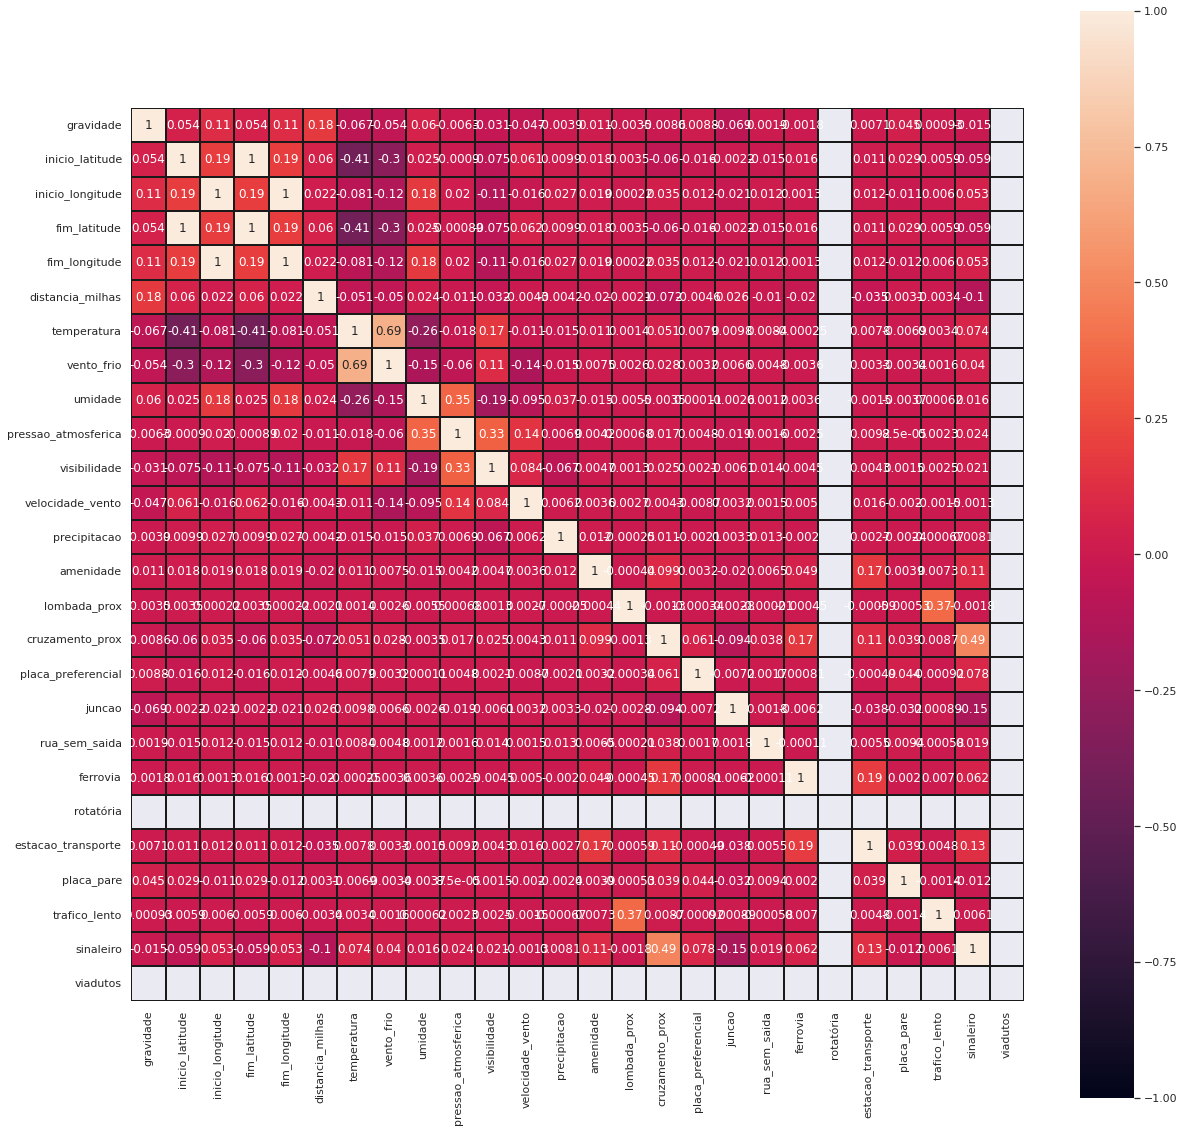

In [37]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Teste SQL

## Tabelas de referencia

#### monte as querys com base nos esquemas abaixa

In [38]:
! pip install pandasql
from pandasql import sqldf

create table books(id int, title varchar(250), year int, author varchar(250));

create table reviewers(id int, name varchar(250));

create table ratings(reviewer_id int, book_id int, rating int, rating_date date);

In [39]:
query_create_book = """
CREATE TABLE book (
id INTEGER  NOT NULL PRIMARY KEY AUTOINCREMENT, 
title TEXT (250) NOT NULL,
year INTEGER 
autor TEXT (250))
;

"""

book =sqldf(query_create_book, globals())

In [40]:

query_create_reviewrs = """
CREATE TABLE reviewrs (
reviewer_id INTEGER  NOT NULL PRIMARY KEY AUTOINCREMENT, 
book_id INTEGER NOT NULL,
nome TEXT(250),
year INTEGER,
autor TEXT(250) )

"""

reviewrs =sqldf(query_create_reviewrs, globals())

In [41]:
#SQLite does not have a storage class set aside for storing dates and/or times. Instead, the built-in Date 
#And Time Functions of SQLite are capable of storing dates and times as TEXT, REAL, or INTEGER values:
query_create_ratings = """
CREATE TABLE reviewrs (
reviewer_id INTEGER  AUTOINCREMENT, 
book_id INTEGER NOT NULL,
transacao INTEGER PRIMARY KEY,
rating INTEGER NOT NULL,
rating_date TEXT (250),
autor TEXT(250) ,
FOREIGN KEY(reviewer_id) REFERENCES book(book_id))
;

"""

ratings =sqldf(query_create_reviewrs, globals())

#### Selecione os livros que tem rating maior que 4, livros devem ser ordenados alfabeticamente



```
# Isto está formatado como código
SELECT * 
FROM books
INNER JOIN ratings on ratings.book_id = books.id
WHERE ratings.rating > 4 
ORDER BY books.title ASC;


```



#### Mostre a quantidade de reviews para cada titulo, assim como sua nota media, minima e maxima



```
# Isto está formatado como código
SELECT q1.*,
COUNT(q1.rating) OVER(PARTITION BY q1.title),
AVG(q1.rating) OVER(PARTITION BY q1.title),
MIN(q1.rating) OVER(PARTITION BY q1.title),
MAX(q1.rating) OVER(PARTITION BY q1.title)
FROM
(SELECT book.title, ratings.rating
FROM books
INNER JOIN reviewrs on reviewrs.book_id = books.id
INNER JOIN ratings on ratings.book_id = books.id) as q1

```



#### Construa uma coluna de rank para as reviews de cada livro com base na em sua respectiva nota (em caso de empate o critério de desempate será a data da review)

ex:

ID:1, Title:Capitães da areia, rating:5, rank:3

ID:1, Title:Capitães da areia, rating:4.9, rank:4

ID:1, Title:Capitães da areia, rating:3, rank:6 

ID:1, Title:Capitães da areia, rating:1, rank:8 

ID:1, Title:Capitães da areia, rating:4, rank:5

ID:1, Title:Capitães da areia, rating:2, rank:7 

ID:1, Title:Capitães da areia, rating:9, rank:1 

ID:1, Title:Capitães da areia, rating:8, rank:2

ID:2, Title:Game of Thrones, rating:9.5, rank:1 

ID:2, Title:Game of Thrones, rating:8, rank:2



```
# Isto está formatado como código
SELECT Q1.*,
Rank() OVER(ORDER BY Q1.rating) as Rank(rating)
FROM
(SELECT book.title, ratings.rating
FROM books
INNER JOIN reviewrs on reviewrs.book_id = books.id
INNER JOIN ratings on ratings.book_id = books.id) as Q1
ORDER BY rating,rating_date
```

